In [2]:
sql_query = sql_query = "select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt\
    from properties_2017 join predictions_2017 on properties_2017.parcelid = predictions_2017.parcelid where propertylandusetypeid = 261"
directory = os.getcwd()
url_for_query = wrg.get_db_url("zillow")
filename = "zillow_2017_project.csv"


In [3]:
zillow_2017 = wrg.get_sql_data(sql_query, url_for_query, filename)

csv found and loaded


In [4]:
zillow_2017.shape

(52442, 6)

In [5]:
zillow_2017.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt
0,0,4.0,3.5,3100.0,1023282.0,1998.0
1,1,2.0,1.0,1465.0,464000.0,1967.0
2,2,3.0,2.0,1243.0,564778.0,1962.0
3,3,4.0,3.0,2376.0,145143.0,1970.0
4,4,4.0,3.0,2962.0,773303.0,1950.0


In [6]:
wrg.is_it_null(zillow_2017)  

False    52442
Name: Unnamed: 0, dtype: int64
False    52442
Name: bedroomcnt, dtype: int64
False    52442
Name: bathroomcnt, dtype: int64
False    52360
True        82
Name: calculatedfinishedsquarefeet, dtype: int64
False    52441
True         1
Name: taxvaluedollarcnt, dtype: int64
False    52326
True       116
Name: yearbuilt, dtype: int64


In [7]:
zillow_2017=wrg.wrangle_zillow(zillow_2017)

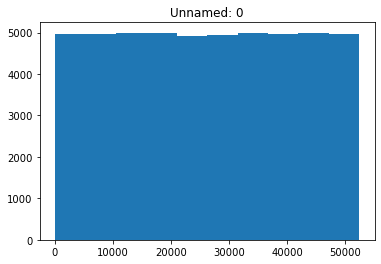

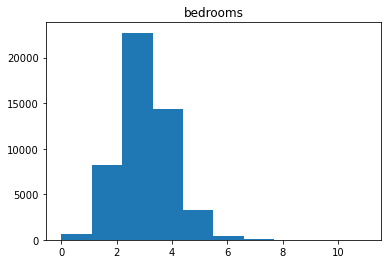

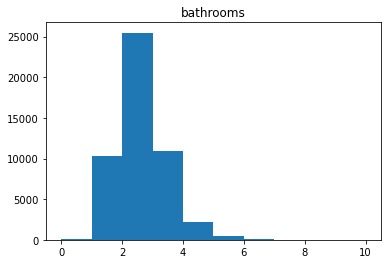

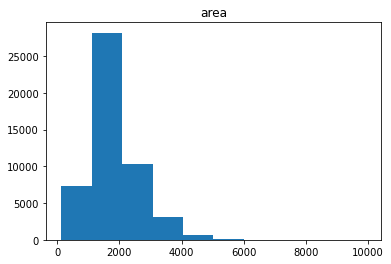

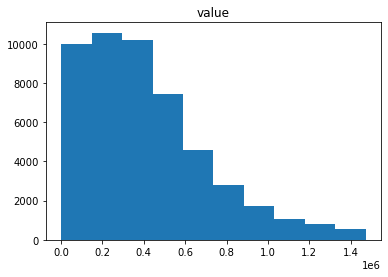

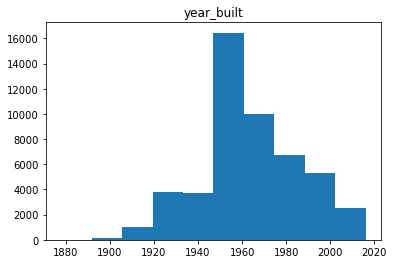

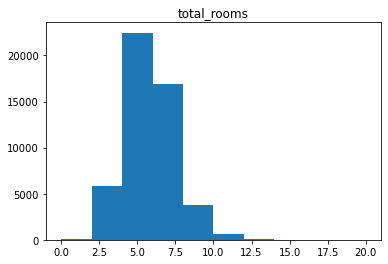

In [8]:
wrg.plot_uni_var(zillow_2017)

In [9]:
#need to remove zeros
zillow_2017.bathrooms.value_counts()

2.0     21609
3.0     10191
1.0      9499
2.5      3872
4.0      1768
1.5       836
3.5       774
4.5       459
5.0       449
6.0        88
5.5        80
0.0        39
7.0        19
6.5        10
8.0         5
7.5         4
9.0         1
10.0        1
Name: bathrooms, dtype: int64

In [10]:
#need to remove zeros
zillow_2017.bedrooms.value_counts()

3     22726
4     14322
2      8200
5      3271
1       589
6       455
7        69
0        54
8        10
9         6
10        1
11        1
Name: bedrooms, dtype: int64

In [11]:
#a function that plots the distribtuiton of a target variable with a mean line
def plot_target_var(df_name, target_var):
    plt.hist(df_name[target_var])
    plt.axvline(df_name[target_var].mean(), color='k', linestyle='dashed', linewidth=1) 
    plt.title("Distribution of Home Values")
    plt.show() 

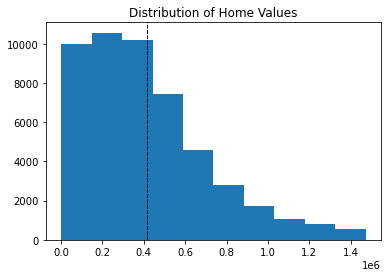

In [12]:
plot_target_var(zillow_2017,'value')

In [13]:
train_zillow, validate_zillow, test_zillow = wrg.split_function_cont_target(zillow_2017)

In [14]:
train_zillow.shape

(29822, 7)

The categorical variables are: 
 [] 

The continuous variables are: 
 ['Unnamed: 0', 'bedrooms', 'bathrooms', 'area', 'value', 'year_built', 'total_rooms'] 

UNNAMED: 0 and value


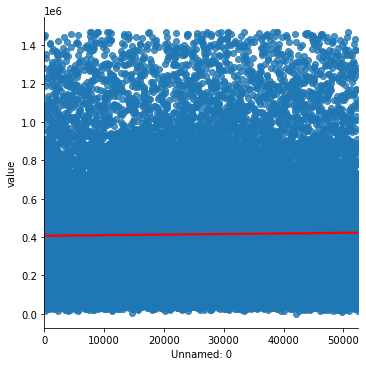

BEDROOMS and value


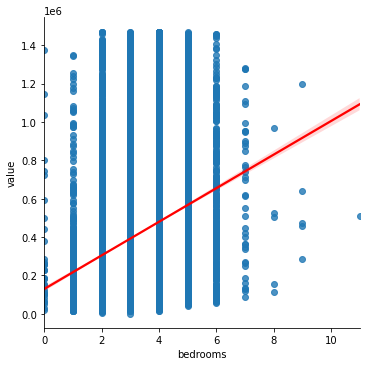

BATHROOMS and value


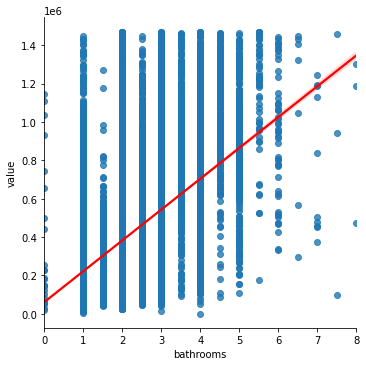

AREA and value


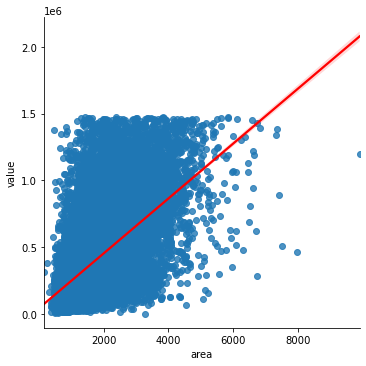

VALUE and value


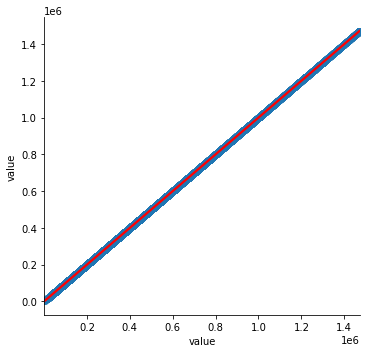

YEAR_BUILT and value


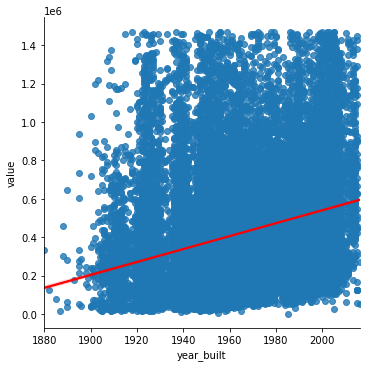

TOTAL_ROOMS and value


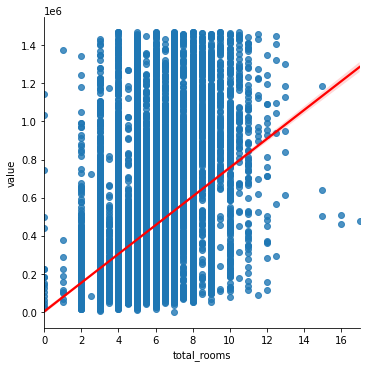

In [15]:
#calls a function that plots the distribution of each cont variable the dataframe against the target variable cat_count is set to 20 to remove beds and baths
wrg.plot_variable_target_pairs(train_zillow,"value", 4) 

The categorical variables are: 
 ['bedrooms', 'bathrooms'] 

The continuous variables are: 
 ['Unnamed: 0', 'area', 'value', 'year_built', 'total_rooms'] 



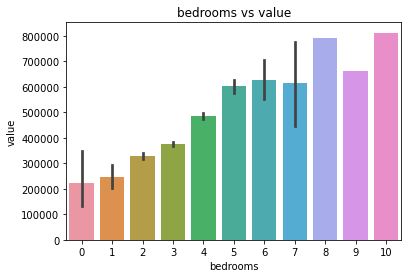

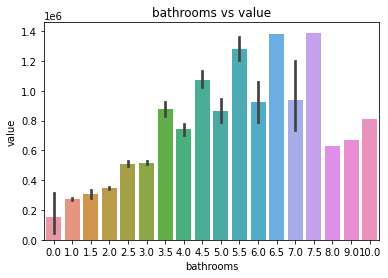

In [16]:
#This plots all the categorical variables against the target variable. Cat_count is set to 20 to make beds and baths categorical
wrg.plot_categorical_and_target_var(test_zillow, "value", 20)

In [17]:
#half bathrooms seems to effect value. Make a categorical feature for half bathrooms

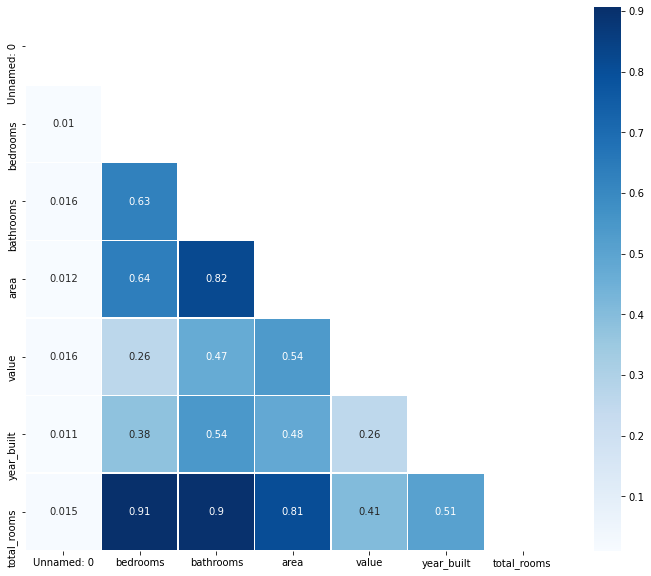

In [18]:
wrg.corr_heatmap(train_zillow)

### Stat testing

In [19]:
#testing for normality of the target variable
wrg.normality_test(train_zillow, "value")


Statistics=0.915521502494812, p=0.0
The sample is NOT normally distributed (reject H0)


/Users/olivertaylor/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


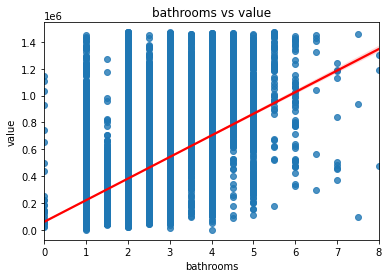

BATHROOMS and value
corr = 0.4393898284288099
p = 0.0
We reject the null hypothesis, there is a linear relationship between the variables



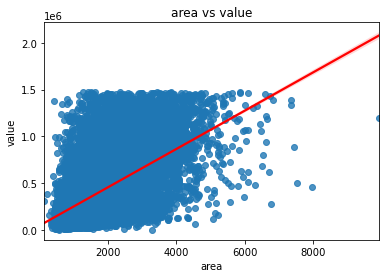

AREA and value
corr = 0.47870555601303366
p = 0.0
We reject the null hypothesis, there is a linear relationship between the variables



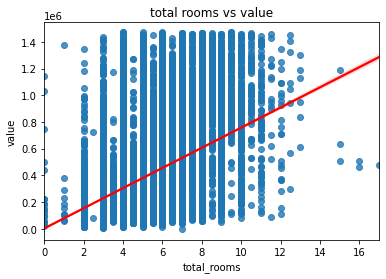

TOTAL_ROOMS and value
corr = 0.3820241423489157
p = 0.0
We reject the null hypothesis, there is a linear relationship between the variables



In [20]:
wrg.spearman_loop(train_zillow, "value")

In [21]:
x_train, x_validate, x_test =train_zillow[["year_built","total_rooms","bathrooms","area"]], validate_zillow[["year_built","total_rooms","bathrooms","area"]], test_zillow[["year_built","total_rooms","bathrooms","area"]]
y_train, y_validate, y_test = train_zillow[["value"]], validate_zillow[["value"]], test_zillow[["value"]]

In [22]:
#scale the data
x_train_scaled, x_validate_scaled, x_test_scaled =wrg.scale_data(x_train, x_validate, x_test)

In [23]:
#modeling

In [24]:
am3.auto_regress( y_train, train_zillow, x_train_scaled, x_validate_scaled, y_validate, x_test_scaled)

           model           RMSE       r^2
0  mean_baseline  299778.909266  0.000000
1          ols_1  249624.996319  0.287360
2          ols_2  247041.575853  0.302034
3           lars  247051.507728  0.301978
4           poly  245256.056573  0.312087
5            glm  252706.286392  0.269658


The best model is the poly model



/Users/olivertaylor/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['Polynomial Model Test', 245399.7543010211, 0.3168485680402042]


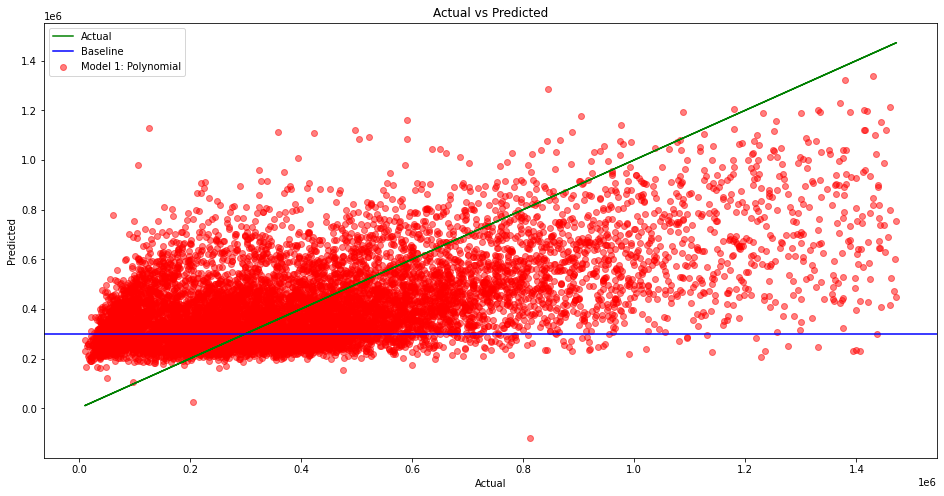

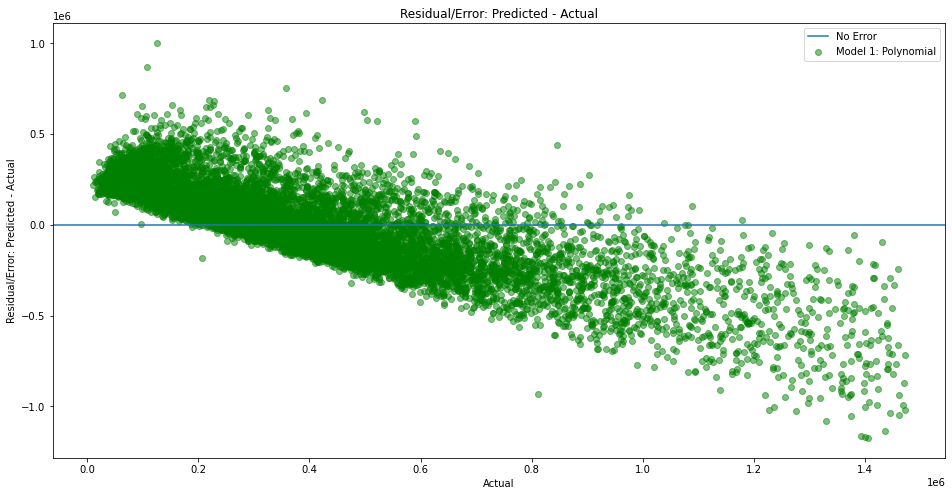

In [25]:
tm.test_poly_model(y_train, y_test, x_train_scaled,x_test_scaled)

In [26]:
zillow_2017_a=wrg.wrangle_zillow2(zillow_2017)

In [27]:
#sort the data by value_bins
zillow_2017_a.sort_values(by="value_bins")    


,Unnamed: 0,bedrooms,bathrooms,area,value,year_built,total_rooms,value_bins
28773,28773,4,2.5,2010,77204,1964,6.5,<100k
9122,9122,2,1.0,1116,35158,1921,3.0,<100k
28072,28072,3,1.0,1102,51103,1952,4.0,<100k
9120,9120,3,2.0,1260,62491,1960,5.0,<100k
48352,48352,3,2.0,1233,97912,1955,5.0,<100k
...,...,...,...,...,...,...,...,...
7012,7012,5,5.0,3154,816758,2003,10.0,800k-900k
9679,9679,3,1.0,1091,811693,1952,4.0,800k-900k
7011,7011,4,4.5,3138,804000,2000,8.5,800k-900k
50690,50690,5,5.0,3921,806180,1978,10.0,800k-900k


In [28]:
#the baseline for the zillow_2017_a dataframe
zillow_2017_a.value_bins.value_counts() / len(zillow_2017_a)    


200k-300k    0.165851
300k-400k    0.157244
100k-200k    0.155165
<100k        0.147363
400k-500k    0.137997
500k-600k    0.099211
600k-700k    0.072139
700k-800k    0.051908
800k-900k    0.013122
900k-1M      0.000000
1M-2M        0.000000
2M-3M        0.000000
3M-4M        0.000000
4M-5M        0.000000
Name: value_bins, dtype: float64

In [29]:
train_zillow_a, validate_zillow_a, test_zillow_a = gwrg.split_function_cat_target(zillow_2017_a, 'value_bins')

In [30]:
train_zillow_a.head()

,Unnamed: 0,bedrooms,bathrooms,area,value,year_built,total_rooms,value_bins
3328,3328,3,3.0,2814,285082,1979,6.0,200k-300k
28235,28235,2,1.0,1252,222642,1939,3.0,200k-300k
30790,30790,4,2.5,2536,135056,1962,6.5,100k-200k
52364,52364,2,1.0,1067,635000,1929,3.0,600k-700k
2002,2002,3,2.5,1941,376767,2001,5.5,300k-400k


In [31]:
x_train, x_validate, x_test =train_zillow_a[["year_built","total_rooms","bathrooms","area"]], validate_zillow_a[["year_built","total_rooms","bathrooms","area"]], test_zillow_a[["year_built","total_rooms","bathrooms","area"]]
y_train, y_validate, y_test = train_zillow_a[["value_bins"]], validate_zillow_a[["value_bins"]], test_zillow_a[["value_bins"]]

In [32]:
#am2a.auto_random_trees(x_train, y_train, x_validate, y_validate)


In [33]:
am2a.auto_random_trees_test(x_test, y_test)

/Users/olivertaylor/codeup-data-science/Zillow_2017_Project/auto_model2a.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_test, y_test)



------------------------ Test Model with depth of 10 ------------------------------
             100k-200k    200k-300k    300k-400k    400k-500k   500k-600k  \
precision     0.489892     0.529172     0.637387     0.654339    0.680934   
recall        0.523775     0.525606     0.402274     0.372470    0.394144   
f1-score      0.506267     0.527383     0.493246     0.474716    0.499287   
support    1388.000000  1484.000000  1407.000000  1235.000000  888.000000   

            600k-700k   700k-800k   800k-900k        <100k  accuracy  \
precision    0.726027    0.810811    1.000000     0.326805  0.494579   
recall       0.410853    0.387931    0.247863     0.809704  0.494579   
f1-score     0.524752    0.524781    0.397260     0.465664  0.494579   
support    645.000000  464.000000  117.000000  1319.000000  0.494579   

             macro avg  weighted avg  
precision     0.650596      0.577557  
recall        0.452736      0.494579  
f1-score      0.490373      0.497555  
support    8